## Adult Income Case Study

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
temp = pd.read_csv('https://raw.githubusercontent.com/MahbubHossainFaisal/Data-Science/master/Pandas/Datasets/adult.csv')

df = temp.copy()

df.head(5)



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [103]:
df.shape

(48842, 15)

### Fetch Random Sample From the Dataset (50%)

In [104]:
df.sample(frac=.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
20546,32,Private,34104,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,55,United-States,>50K
24286,23,Private,189830,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,50,United-States,<=50K
45315,29,Private,356133,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,40,United-States,<=50K
33762,18,Private,205894,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,25,?,<=50K
2438,64,?,285742,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,30,Self-emp-not-inc,370498,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
14004,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
17213,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
1613,40,Private,173651,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [105]:
## Random seed example

import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'Emily', 'Tom'],
        'Age': [25, 30, 35, 40, 45],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']}
df = pd.DataFrame(data)

# Set a random seed
random_seed = 42

# Randomly sample 3 rows from the DataFrame using the seed
sample = df.sample(n=3, random_state=random_seed)

print(sample)


    Name  Age    City
1  Alice   30  London
4    Tom   45  Sydney
2    Bob   35   Paris


By setting random_state=random_seed, the random sample will be the same every time you run the code with random_seed set to 42. If you change the seed value, you will get a different random sample.

### Example of weights

Weights:
Weights allow you to assign probabilities or sampling proportions to each element in a dataset. When performing random sampling with weights, elements with higher weights are more likely to be selected compared to elements with lower weights.

In [106]:
import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'Emily', 'Tom'],
        'Age': [25, 30, 35, 40, 45],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']}
df = pd.DataFrame(data)

# Assign weights to each row
weights = [0.1, 0.2, 0.3, 0.2, 0.2]

# Randomly sample 2 rows from the DataFrame with weights
sample = df.sample(n=2, weights=weights)

print(sample)


    Name  Age    City
2    Bob   35   Paris
1  Alice   30  London


In this case, each row in the DataFrame has a corresponding weight in the weights list. The higher the weight assigned to a row, the more likely it is to be included in the random sample. The probability of selecting a row is proportional to its weight relative to the sum of all weights. So, in the example, the row with a weight of 0.3 has a higher chance of being selected compared to the other rows.

### Check Null Values In The Dataset

In [107]:
df = temp.copy()
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

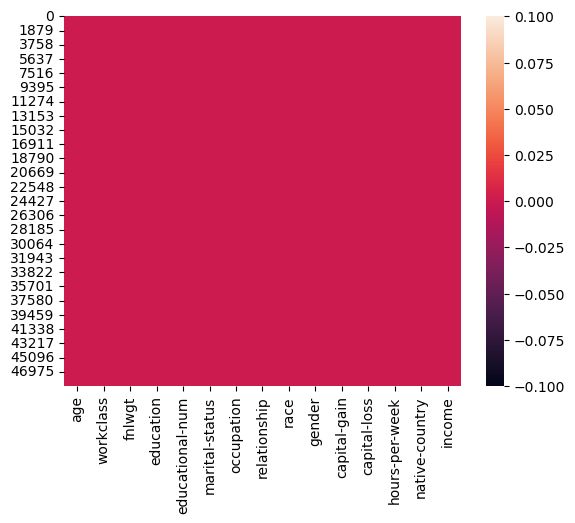

In [108]:
sns.heatmap(df.isnull())

### Perform Data Cleaning [ Replace '?' with NaN ]

In [109]:
# finding rows that has ? in the column values
df[df.isin(['?']).any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [110]:
# Replacing ? to NAN

what_rows = df[df.isin(['?']).any(axis=1)]

df.loc[what_rows.index] = df.loc[what_rows.index].replace('?',np.nan)


<AxesSubplot:>

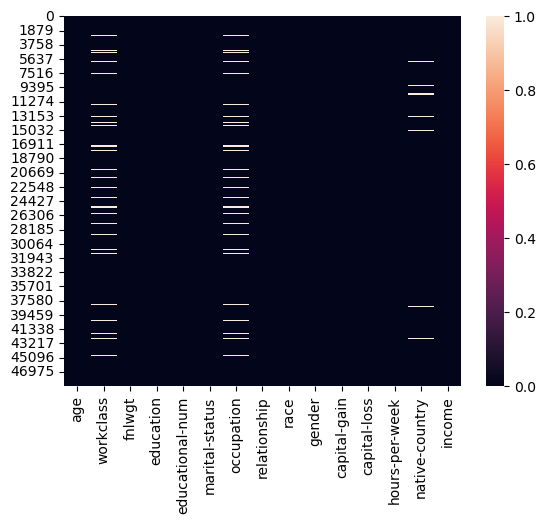

In [111]:
# verifying
sns.heatmap(df.isnull())

We can see that NaN values are showing in the graph

### Drop all The Missing Values

In [112]:
per_col_missing_data_percentage = df.isnull().sum()*100/len(df)
per_col_missing_data_percentage

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [113]:
#dropping null values
df.dropna(how='any',inplace = True)

In [114]:
#verifying
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Check For Duplicate Data and Drop Them

In [115]:
# checking for duplicate data

df[df.duplicated()]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [116]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [117]:
df.shape

(45222, 15)

### Get Overall Statistics About The Dataframe

In [118]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Drop The Columns education-num, capital-gain, and capital-loss

In [119]:
col = ['educational-num','capital-gain','capital-loss']

df.drop(columns=col, inplace = True)

In [120]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Univariate Analysis

### What Is The Distribution of Age Column?

In [121]:
df['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

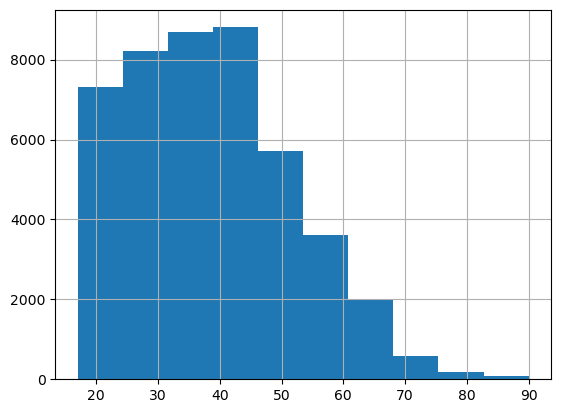

In [122]:
df['age'].hist()

### Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method

In [123]:
sum(df['age'].between(17,48))

34902

### What is The Distribution of Workclass Column?

In [124]:
df['workclass'].describe()

count       45222
unique          7
top       Private
freq        33307
Name: workclass, dtype: object

<AxesSubplot:>

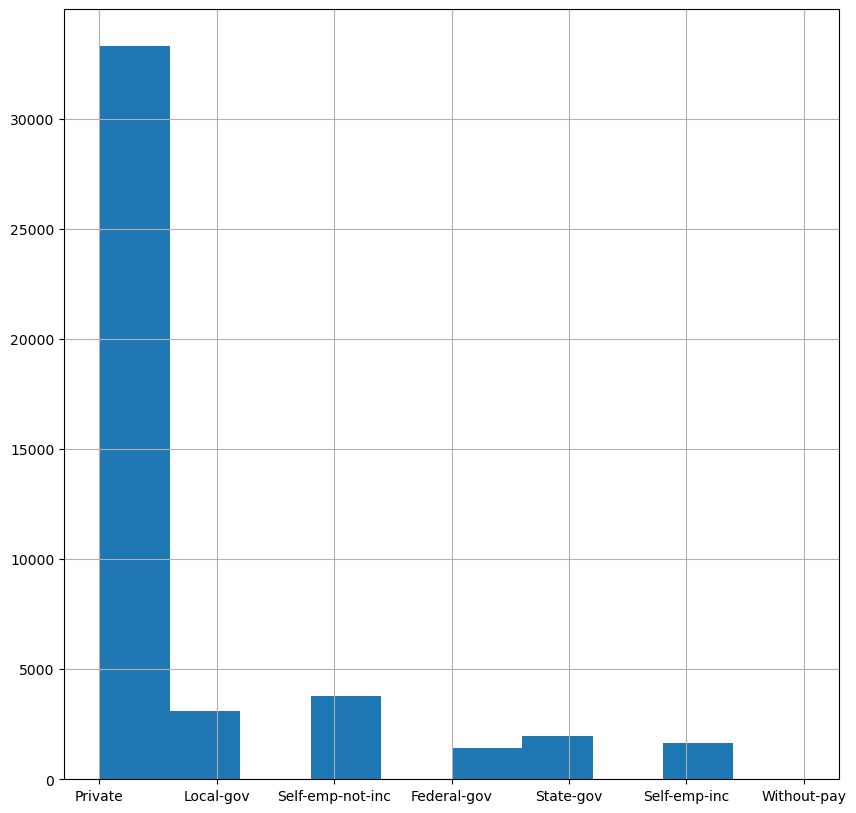

In [125]:
plt.figure(figsize=(10,10))
df['workclass'].hist()

### How Many Persons Having Bachelors and Masters Degree?

In [126]:
df.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K


In [127]:
len(df[df['education']=='Bachelors']) + len(df[df['education']=='Masters'])

10084

In [128]:
# another way

sum(df['education'].isin(['Bachelors','Masters']))

10084

### Bivariate Analsis (Relationship between two columns)

<AxesSubplot:xlabel='income', ylabel='age'>

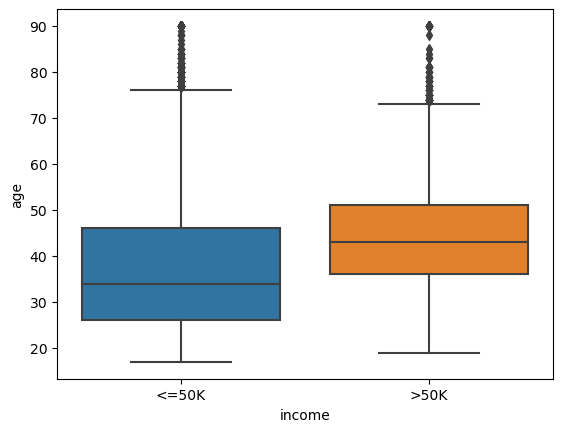

In [129]:
sns.boxplot(x='income',y='age',data=df)

### Replace Salary Values With 0 and 1

In [130]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

C:\Users\Mahbub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

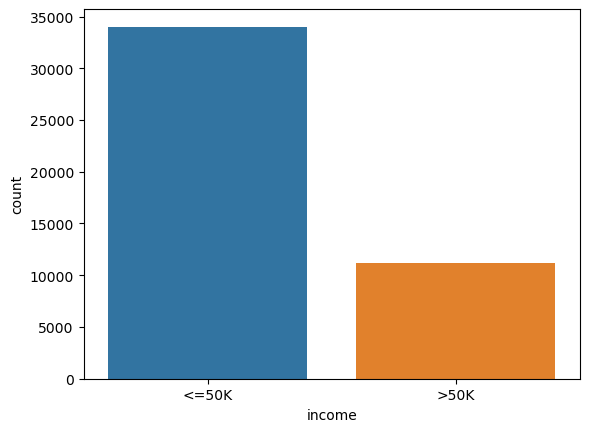

In [131]:
sns.countplot('income',data=df)

In [132]:
def change_salary(sal):
    if sal == '>50K':
        return 1
    else:
        return 0

In [133]:
df['income'] = df['income'].apply(change_salary)

In [134]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


### Which Workclass Getting The Highest Salary?

In [141]:
df.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554070
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.278978
State-gov           0.267215
Private             0.217702
Without-pay         0.095238
Name: income, dtype: float64

### Who Has Better Chance To Get Salary greater than 50K Male or Female?

In [143]:
df.groupby('gender')['income'].mean().sort_values(ascending = False)

gender
Male      0.312477
Female    0.113576
Name: income, dtype: float64

### Covert workclass Columns Datatype To Category Datatype

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   gender          45222 non-null  object
 9   hours-per-week  45222 non-null  int64 
 10  native-country  45222 non-null  object
 11  income          45222 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [147]:
df['workclass'] = df['workclass'].astype('category')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  object  
 4   marital-status  45222 non-null  object  
 5   occupation      45222 non-null  object  
 6   relationship    45222 non-null  object  
 7   race            45222 non-null  object  
 8   gender          45222 non-null  object  
 9   hours-per-week  45222 non-null  int64   
 10  native-country  45222 non-null  object  
 11  income          45222 non-null  int64   
dtypes: category(1), int64(4), object(7)
memory usage: 4.2+ MB
